In [1]:
# import libraries
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
import tensorflow as tf
# from tensorflow.keras.applications.inception_v3 import InceptionV3
# from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
# from tensorflow.keras.models import Model
# import tensorflow_hub as hub

# from facenet import load_model, to_rgb, prewhiten
# from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
import torchvision
import torch.nn as nn
import torch

2023-04-30 21:39:41.677964: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 21:39:42.327724: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sougato97/miniconda3/envs/torch/lib/python3.7/site-packages/cv2/../../lib64:/opt/ros/noetic/lib
2023-04-30 21:39:42.327807: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sougato97/miniconda3/e

In [2]:
# define a function to preprocess an image
def preprocess_image(image_path):

    # read the image
    image = cv2.imread(image_path)

    # convert to RGB color space
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # resize to 160x160 pixels
    image = cv2.resize(image, (160, 160))

    # normalize the pixel values
    image = image.astype("float32")
    image = (image - 127.5) / 128.0

    # convert to tensor and add batch dimension
    image = tf.convert_to_tensor(image)
    image = image[tf.newaxis, ...]

    return image


# define a function to compute cosine similarity
def cosine_similarity(a, b):

    # normalize the vectors
    a = tf.math.l2_normalize(a, axis=1)
    b = tf.math.l2_normalize(b, axis=1)

    # compute the dot product
    dot_product = tf.matmul(a, b, transpose_b=True)

    # return the cosine similarity
    return dot_product


def get_2k_descriptor(im):

    image = tf.image.convert_image_dtype(im, tf.float32)

    module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/1")
    height, width = hub.get_expected_image_size(module)
    resized_image = tf.image.resize_images(image, [224, 224])
    reshaped_image = tf.reshape(resized_image, [1, 224, 224, 3])
    feature = module(reshaped_image) 
    return feature

def find_faces_with_bbox(img):
    faces, confidences = cv.detect_face(img)
    # loop through detected faces and add bounding box
    for face in faces:
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]
        # draw rectangle over face
        cv2.rectangle(img, (startX,startY), (endX,endY), (0,255,0), 2)
    return faces, confidences, img

def forward(self, x):
  x = self.features(x)
  x = self.avgpool(x)
  x = torch.flatten(x, 1)
  # return the output of the second-to-last layer
  x = self.classifier[:-1](x)
  return x

transform = torchvision.transforms.Compose([
  torchvision.transforms.Resize(256),
  torchvision.transforms.CenterCrop(224),
  torchvision.transforms.ToTensor()
  # torchvision.transforms.Normalize(
  #   mean=[0.485, 0.456, 0.406],
  #   std=[0.229, 0.224, 0.225]
  # )
])

In [3]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('sougato.jpg')
img3 = cv2.imread('ninad.jpg')
img4 = cv2.imread('vaishnavi.jpg')
# # Load the InceptionV3 model
# base_model = InceptionV3(weights='imagenet', include_top=False)

In [4]:
faces_1, confidences_1, img1 = find_faces_with_bbox(img1)
face = faces_1[0]
# img1[ymin:ymax, xmin:xmax]
sougato_1 = img1[face[1]:face[3], face[0]:face[2]] # got after printing the image
# new_size = (224, 224)
# sougato_1 = cv2.resize(sougato_1, (224, 224))

In [5]:
face = faces_1[1]
shu = img1[face[1]:face[3], face[0]:face[2]] # got after printing the image

In [6]:
faces_2, confidences_2, img2 = find_faces_with_bbox(img2)
face = faces_2[0]
# img1[ymin:ymax, xmin:xmax]
sougato_2 = img2[face[1]:face[3], face[0]:face[2]]

In [7]:
faces_3, confidences_3, img3 = find_faces_with_bbox(img3)
face = faces_3[0]
# img1[ymin:ymax, xmin:xmax]
ninad = img3[face[1]:face[3], face[0]:face[2]]

In [8]:
faces_4, confidences_4, img4 = find_faces_with_bbox(img4)
face = faces_4[0]
# img1[ymin:ymax, xmin:xmax]
vaishnavi = img4[face[1]:face[3], face[0]:face[2]]

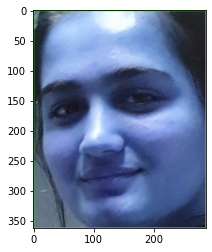

In [9]:
# Display the image
plt.imshow(vaishnavi)

# Show the plot
plt.show()

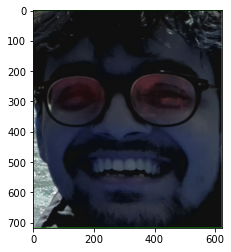

In [10]:
# Display the image
plt.imshow(sougato_1)

# Show the plot
plt.show()

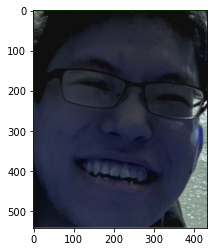

In [11]:
# Display the image
plt.imshow(shu)

# Show the plot
plt.show()

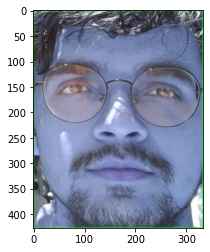

In [12]:
# Display the image
plt.imshow(sougato_2)

# Show the plot
plt.show()

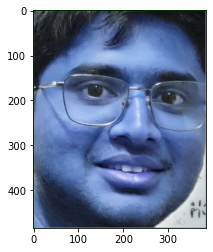

In [13]:
# Display the image
plt.imshow(ninad)

# Show the plot
plt.show()

Get the feature vector

In [14]:
model = torchvision.models.resnet152(pretrained=True)
# Set the model to evaluation mode
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
# converting images ot PIL 
sougato_1 = Image.fromarray(sougato_1)
sougato_2 = Image.fromarray(sougato_2)
shu = Image.fromarray(shu) 
ninad = Image.fromarray(ninad) 
vaishnavi = Image.fromarray(vaishnavi) 

sougato_1 = transform(sougato_1).unsqueeze(0)
sougato_2 = transform(sougato_2).unsqueeze(0)
shu = transform(shu).unsqueeze(0)
ninad = transform(ninad).unsqueeze(0)
vaishnavi = transform(vaishnavi).unsqueeze(0)

In [16]:
# get the feature vector
sougato_vector_1 = model(sougato_1)
sougato_vector_2 = model(sougato_2)
shu_vector = model(shu)
ninad_vector = model(ninad)
vaishnavi_vector = model(vaishnavi)

In [17]:
# # Normalize the vectors 
# sougato_1 = torch.nn.functional.normalize(sougato_1, dim=1)
# sougato_2 = torch.nn.functional.normalize(sougato_2, dim=1)
# shu = torch.nn.functional.normalize(shu, dim=1)
# ninad = torch.nn.functional.normalize(ninad, dim=1)
# vaishnavi = torch.nn.functional.normalize(vaishnavi, dim=1)

Find the distance 

In [18]:
# create a cosine similarity module
cos_sim = nn.CosineSimilarity(dim=1)

# compute the cosine similarity between x and y
similarity_1 = cos_sim(sougato_vector_1, sougato_vector_2)
similarity_2 = cos_sim(shu_vector, sougato_vector_1)
similarity_3 = cos_sim(ninad_vector, shu_vector)
similarity_4 = cos_sim(ninad_vector, sougato_vector_1)
similarity_5 = cos_sim(vaishnavi_vector, ninad_vector)

In [19]:
similarity_1

tensor([0.8638], grad_fn=<DivBackward0>)

In [20]:
similarity_2

tensor([0.8877], grad_fn=<DivBackward0>)

In [21]:
similarity_3

tensor([0.8878], grad_fn=<DivBackward0>)

In [22]:
similarity_4

tensor([0.8223], grad_fn=<DivBackward0>)

In [23]:
similarity_5

tensor([0.9073], grad_fn=<DivBackward0>)

In [ ]:
sougato_1.shape

In [ ]:
distance

In [ ]:
# vector_1 = get_2k_descriptor(sougato_1)

In [ ]:
# temp_img = Image.open(image_path)

Face 2 

In [ ]:
faces, confidences = cv.detect_face(img2)

In [ ]:
# # Load ResNet50 model
# resnet50_model = tf.keras.applications.ResNet50(weights='imagenet')

# Load VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, pooling='avg')


# # Print the model summary
# resnet50_model.summary()

In [ ]:
# Convert image to RGB format
sougato_2 = cv2.cvtColor(sougato_2, cv2.COLOR_BGR2RGB)


# # Convert image to tensor
# tensor = tf.convert_to_tensor(sougato_2)


# # Resize image to (224, 224)
# image = cv2.resize(image, (224, 224))


from tensorflow.keras.applications.resnet50 import preprocess_input

# Convert image to tensor and preprocess
tensor = preprocess_input(np.expand_dims(sougato_2, axis=0))

In [ ]:
tensor.shape

get the feature vector

In [ ]:
# Specify the layer to extract features from
layer_name = 'block5_pool'
intermediate_layer_model = Model(inputs=vgg16_model.input, outputs=vgg16_model.get_layer(layer_name).output)

In [ ]:
# Extract feature vector
features = intermediate_layer_model.predict(tensor)

In [ ]:
features

In [ ]:
# Extract embeddings
embeddings = vgg16_model.predict(tensor)
# embeddings = resnet50_model.predict(tensor)

end

In [ ]:
# run the model on the images
output1 = model(image1)
output2 = model(image2)

In [ ]:
image_path = '2.jpg'
img2 = cv2.imread(image_path)

In [ ]:
faces, confidences = cv.detect_face(img2)
# loop through detected faces and add bounding box
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    # draw rectangle over face
    cv2.rectangle(img2, (startX,startY), (endX,endY), (0,255,0), 2)
# display output        
plt.imshow(img2)
plt.show()

In [ ]:
from cvlib.object_detection import draw_bbox

bbox, label, conf = cv.detect_common_objects(img2, enable_gpu=True)

output_image = draw_bbox(img2, bbox, label, conf)

In [ ]:
# display output        
plt.imshow(img2)
plt.show()

In [ ]:
# Saving the image
cv2.imwrite("2_bbox.jpg", img2)

In [ ]:
# Saving the image
cv2.imwrite("1_bbox.jpg", img1)